<a href="https://colab.research.google.com/github/evansuslovich/ChordWave/blob/main/Chord_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")

/var/folders/h3/bjs1pm5n7475gbgm4thkybrm0000gn/T/ipykernel_6305/2192911794.py:3: DtypeWarning: Columns (2,3,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")


In [2]:
df.head()

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
0,1,<intro_1> C <verse_1> F C E7 Amin C F C G7 C F...,NaN,'classic country pop',NaN,NaN,artist_1,pop,NaN,4AIEGdwDzPELXYgM5JaEY5
1,2,<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs...,2003-01-01,'alternative metal' 'alternative rock' 'nu met...,2000.0,pop rock,artist_2,metal,2ffJZ2r8HxI5DHcmf3BO6c,694QW15WkebjcrWgQHzRYF
2,3,<intro_1> Csmin <verse_1> A Csmin A Csmin A Cs...,2003-01-01,'alternative metal' 'canadian rock' 'funk meta...,2000.0,canadian rock,artist_3,metal,5KiY8SZEnvCPyIEkFGRR3y,0niJkG4tKkne3zwr7I8n9n
3,4,<intro_1> D Dmaj7 D Dmaj7 <verse_1> Emin A D G...,2022-09-23,NaN,2020.0,NaN,artist_4,NaN,01TtAcUqyLCRBZq4ZZiQWS,17BfKBemmMGO5ZAK25wraW
4,5,<intro_1> C <verse_1> G C G C <chorus_1> F Dmi...,2023-02-10,'modern country pop',2020.0,NaN,artist_5,pop,3zUecdrWC3IqrNSjhnoF3G,4GGfAshSkqoxpZdoaHm7ky


In [3]:
subset_df = df[['id', 'chords', 'genres', 'decade', 'main_genre']]
subset_df.head()

,id,chords,genres,decade,main_genre
0,1,<intro_1> C <verse_1> F C E7 Amin C F C G7 C F...,'classic country pop',NaN,pop
1,2,<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs...,'alternative metal' 'alternative rock' 'nu met...,2000.0,metal
2,3,<intro_1> Csmin <verse_1> A Csmin A Csmin A Cs...,'alternative metal' 'canadian rock' 'funk meta...,2000.0,metal
3,4,<intro_1> D Dmaj7 D Dmaj7 <verse_1> Emin A D G...,NaN,2020.0,NaN
4,5,<intro_1> C <verse_1> G C G C <chorus_1> F Dmi...,'modern country pop',2020.0,pop


In [4]:
cleaned_df = subset_df.dropna()
cleaned_df.head()

,id,chords,genres,decade,main_genre
1,2,<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs...,'alternative metal' 'alternative rock' 'nu met...,2000.0,metal
2,3,<intro_1> Csmin <verse_1> A Csmin A Csmin A Cs...,'alternative metal' 'canadian rock' 'funk meta...,2000.0,metal
4,5,<intro_1> C <verse_1> G C G C <chorus_1> F Dmi...,'modern country pop',2020.0,pop
6,7,<intro_1> G Bmin Amin D G Bmin <verse_1> Amin ...,'modern country pop',2020.0,pop
7,8,<intro_1> Fsmin Fsno3d Bno3d E/B Fsno3d Bno3d ...,'french pop' 'nouvelle chanson francaise',2020.0,pop


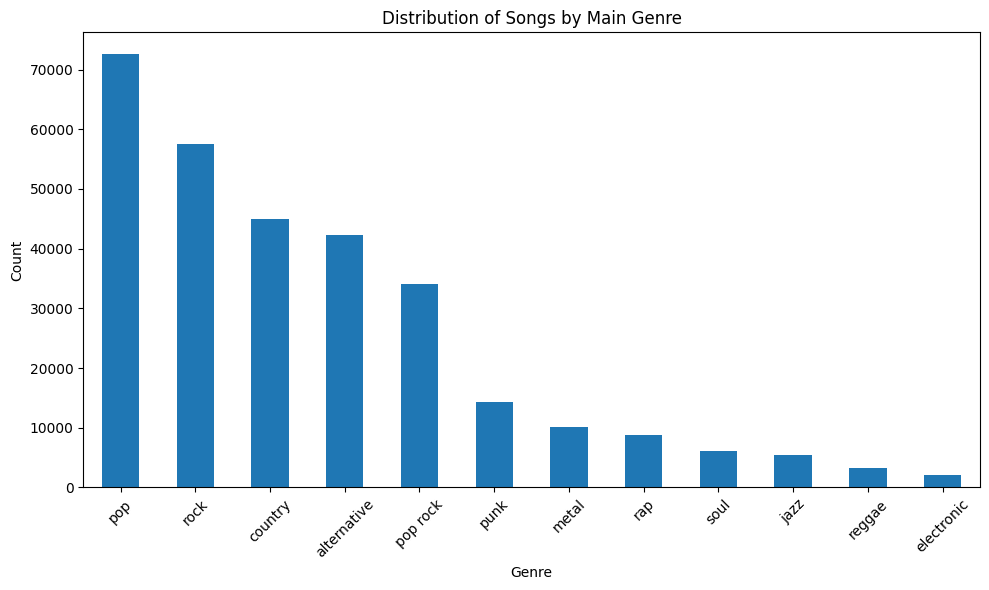

In [5]:
import matplotlib.pyplot as plt

# For 'main_genre'
plt.figure(figsize=(10, 6))
cleaned_df['main_genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Songs by Main Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

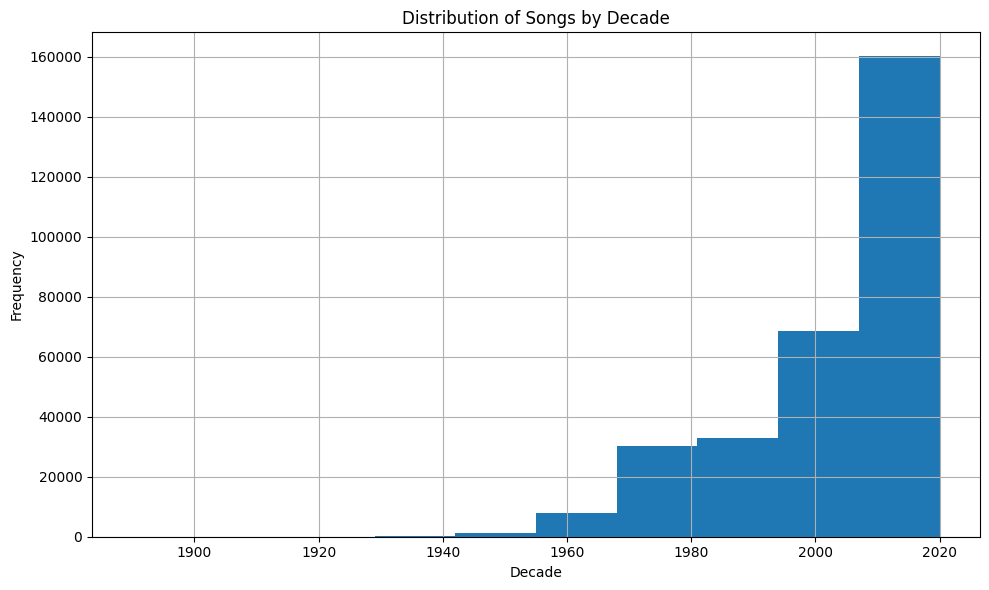

In [6]:
# For 'decade'
plt.figure(figsize=(10, 6))
cleaned_df['decade'].hist(bins=10)
plt.title('Distribution of Songs by Decade')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

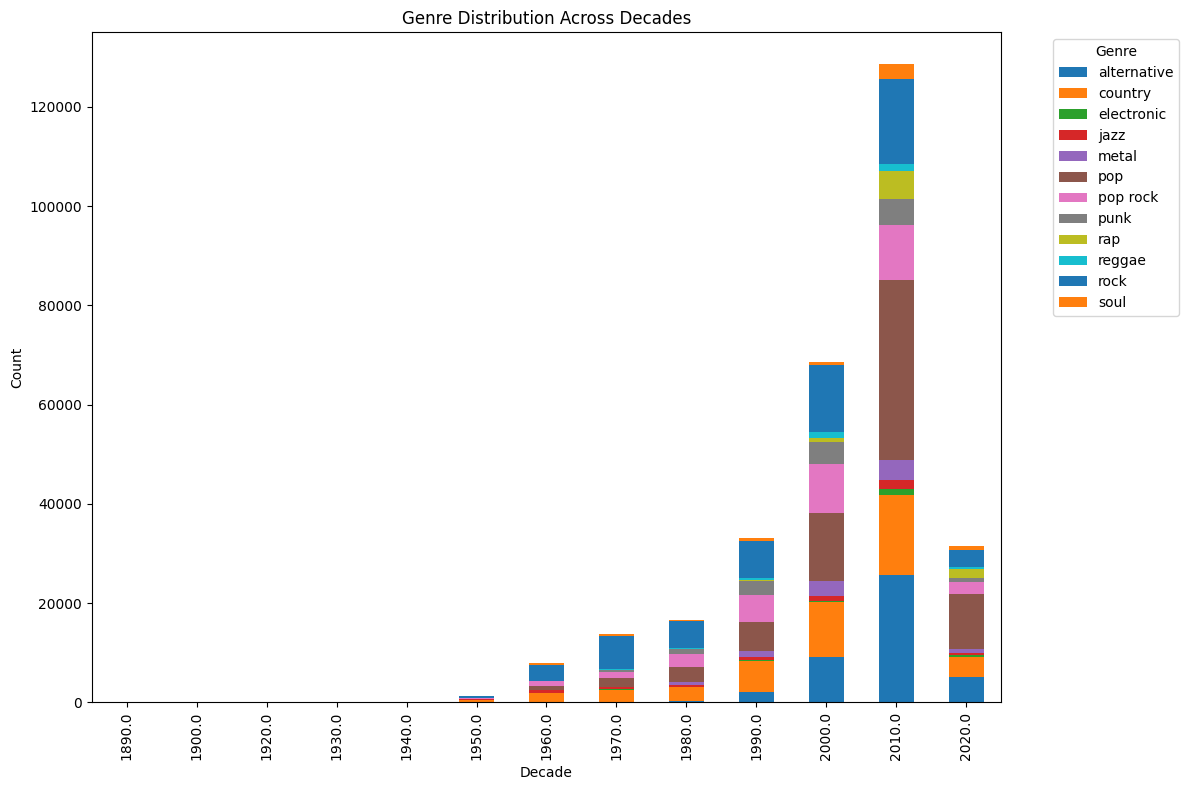

In [7]:
# Create a crosstab of decade vs main_genre
decade_genre = pd.crosstab(cleaned_df['decade'], cleaned_df['main_genre'])

# Plot stacked bar chart
decade_genre.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Genre Distribution Across Decades')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
import seaborn as sns
import re
from collections import Counter

def extract_chords(chord_string):
    cleaned = re.sub(r'<[^>]+>', ' ', chord_string)
    return [chord for chord in cleaned.split() if chord.strip()]

/var/folders/h3/bjs1pm5n7475gbgm4thkybrm0000gn/T/ipykernel_6305/62994528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['chord_list'] = cleaned_df['chords'].apply(extract_chords)
/var/folders/h3/bjs1pm5n7475gbgm4thkybrm0000gn/T/ipykernel_6305/62994528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['unique_chord_count'] = cleaned_df['chord_list'].apply(lambda x: len(set(x)))


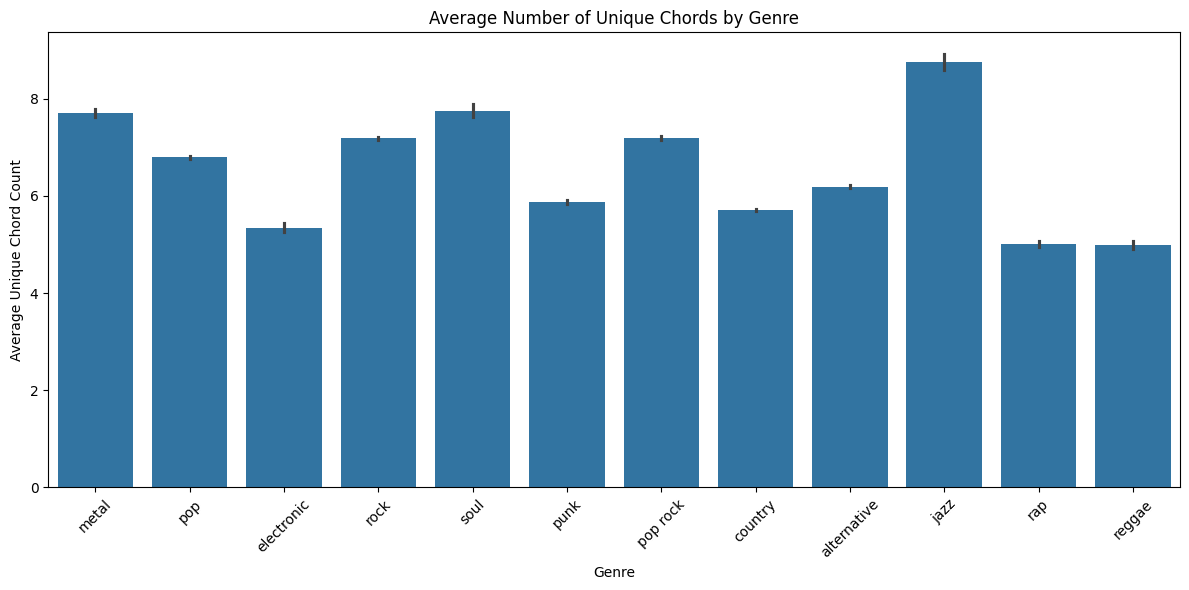

In [9]:
cleaned_df['chord_list'] = cleaned_df['chords'].apply(extract_chords)

cleaned_df['unique_chord_count'] = cleaned_df['chord_list'].apply(lambda x: len(set(x)))

plt.figure(figsize=(12, 6))
sns.barplot(x='main_genre', y='unique_chord_count', data=cleaned_df)
plt.title('Average Number of Unique Chords by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Unique Chord Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
def top_chords_by_genre(genre_df, n=5):
    all_chords = [chord for sublist in genre_df['chord_list'] for chord in sublist]
    return Counter(all_chords).most_common(n)

genre_top_chords = {}
for genre in cleaned_df['main_genre'].unique():
    genre_df = cleaned_df[cleaned_df['main_genre'] == genre]
    genre_top_chords[genre] = top_chords_by_genre(genre_df)

chord_genre_data = []
for genre, chords in genre_top_chords.items():
    for chord, count in chords:
        chord_genre_data.append({'Genre': genre, 'Chord': chord, 'Count': count})

chord_genre_df = pd.DataFrame(chord_genre_data)



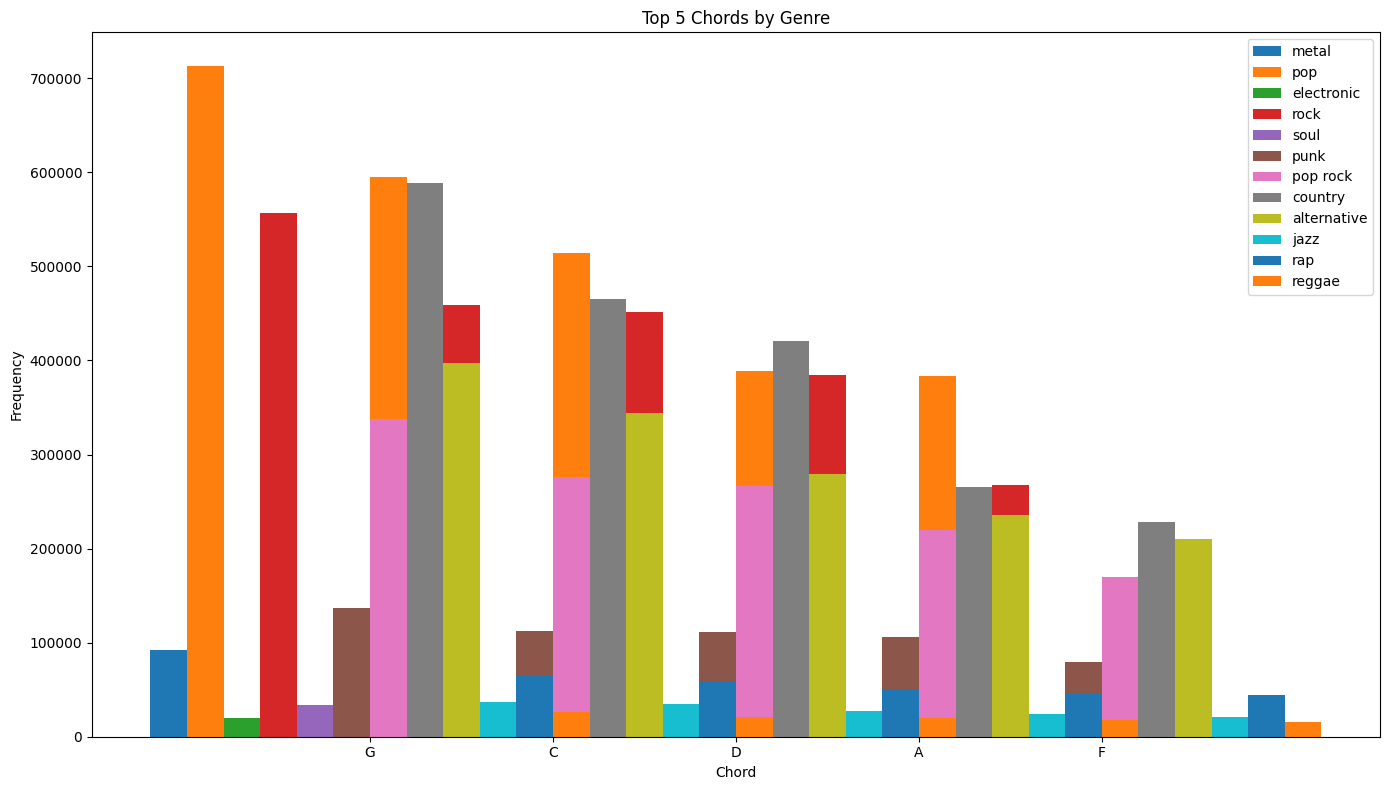

In [11]:
plt.figure(figsize=(14, 8))
genres = chord_genre_df['Genre'].unique()
for i, genre in enumerate(genres):
    genre_data = chord_genre_df[chord_genre_df['Genre'] == genre]
    x = range(len(genre_data))
    plt.bar([j + i*0.2 for j in x], genre_data['Count'], width=0.2, label=genre)
    if i == 0:
        plt.xticks([j + 0.2*(len(genres)-1)/2 for j in x], genre_data['Chord'])

plt.title('Top 5 Chords by Genre')
plt.xlabel('Chord')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
def get_chord_freq_by_genre():
    all_chords = [chord for sublist in cleaned_df['chord_list'] for chord in sublist]
    top_chords = [chord for chord, _ in Counter(all_chords).most_common(15)]

    result = {chord: [] for chord in top_chords}
    result['Genre'] = []

    for genre in cleaned_df['main_genre'].unique():
        genre_df = cleaned_df[cleaned_df['main_genre'] == genre]
        genre_chords = [chord for sublist in genre_df['chord_list'] for chord in sublist]
        total_chords = len(genre_chords)

        if total_chords == 0:
            continue

        genre_counter = Counter(genre_chords)
        result['Genre'].append(genre)

        for chord in top_chords:
            percentage = (genre_counter.get(chord, 0) / total_chords) * 100
            result[chord].append(percentage)

    return pd.DataFrame(result)

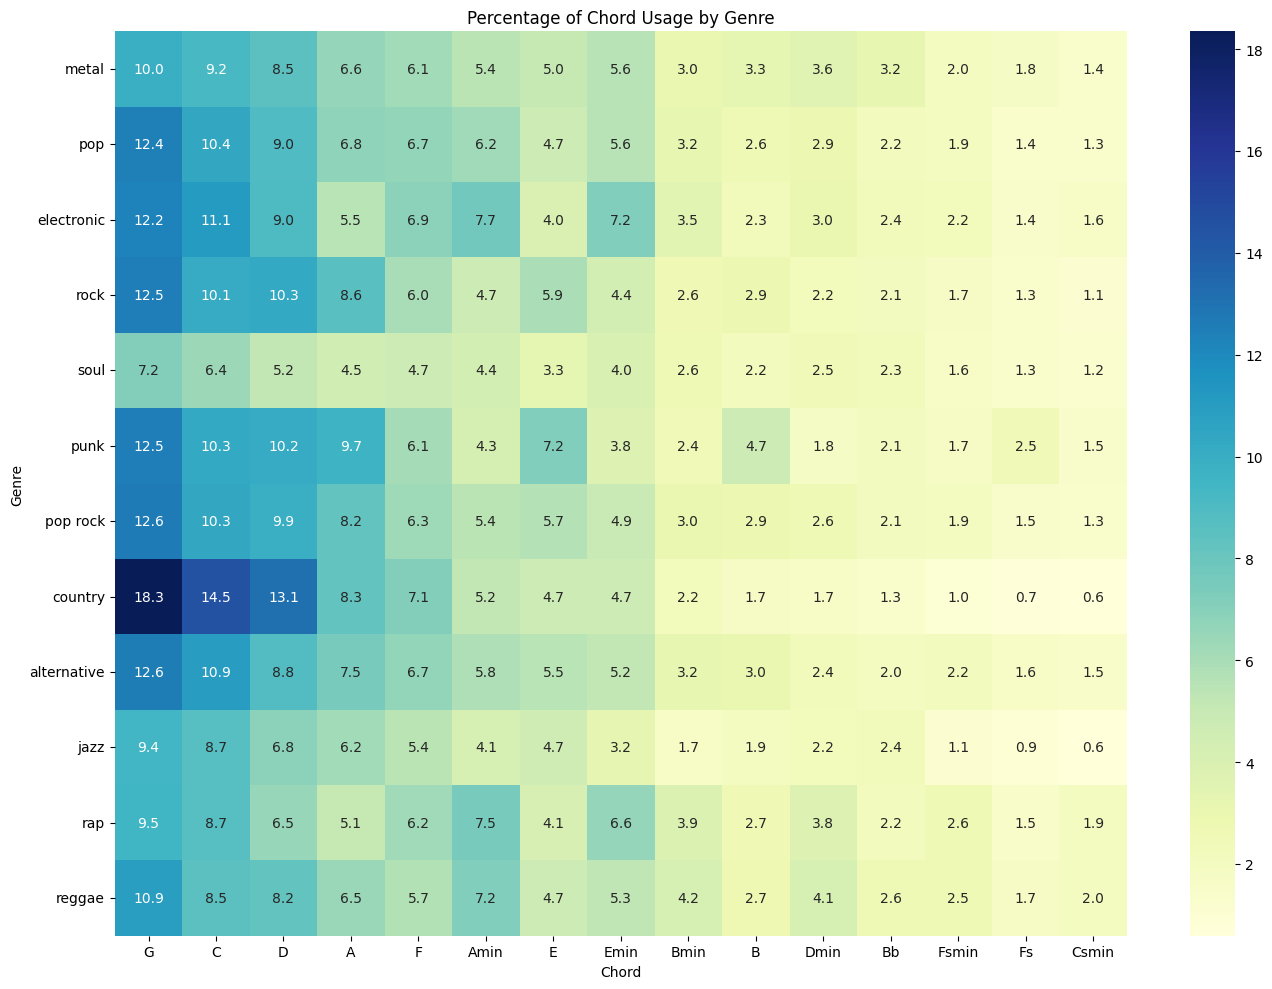

In [13]:
chord_freq_df = get_chord_freq_by_genre()
chord_freq_pivot = chord_freq_df.set_index('Genre')

plt.figure(figsize=(14, 10))
sns.heatmap(chord_freq_pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Percentage of Chord Usage by Genre')
plt.ylabel('Genre')
plt.xlabel('Chord')
plt.tight_layout()
plt.show()

In [14]:
import json
import pandas as pd

# Assuming cleaned_df is already loaded and 'chords' column exists
unique_chords = set()

for chord_entry in cleaned_df['chords']:
    if isinstance(chord_entry, str):
        chords = chord_entry.split()  # Split by whitespace
    elif isinstance(chord_entry, list):
        chords = chord_entry
    else:
        continue  # Skip if not a recognized format

    unique_chords.update(chords)

# Convert to sorted list
unique_chords_list = sorted(unique_chords)

# Save to JSON
with open('data/chords.json', 'w') as f:
    json.dump(unique_chords_list, f, indent=2)

print(f"Saved {len(unique_chords_list)} unique chords to chords.json")


Saved 3601 unique chords to chords.json


In [15]:
import json

# Load original chord list
with open('data/chords.json', 'r') as f:
    chords = json.load(f)

# Define mapping from 's' notation to '#' notation
sharp_map = {
    'Cs': 'C#',
    'Ds': 'D#',
    'Fs': 'F#',
    'Gs': 'G#',
    'As': 'A#',
}

num_changes = 0  # Track number of changes

def convert_sharp(chord):
    global num_changes
    result = ""
    i = 0
    while i < len(chord):
        # Check for a two-character sharp notation
        if i < len(chord) - 1 and chord[i:i+2] in sharp_map:
            # Only convert if not followed by 'sus' or 'add'
            suffix = chord[i+1:i+4]
            if suffix in ('sus', 'add'):
                result += chord[i]
                i += 1
            else:
                result += sharp_map[chord[i:i+2]]
                i += 2
        else:
            result += chord[i]
            i += 1
    if chord != result:
        print(f"Converting from {chord} --> {result}")
        num_changes += 1
    return result

# Apply conversion (preserve order, avoid duplicates only if needed)
converted_chords = [convert_sharp(chord) for chord in chords]

print(f"{num_changes} changed chords")

# Save back to JSON
with open('data/cleaned_chords.json', 'w') as f:
    json.dump(converted_chords, f, indent=2)


Converting from A/As --> A/A#
Converting from A/Cs --> A/C#
Converting from A/Ds --> A/D#
Converting from A/Fs --> A/F#
Converting from A/Gs --> A/G#
Converting from A11/Cs --> A11/C#
Converting from A13/Cs --> A13/C#
Converting from A13/Ds --> A13/D#
Converting from A13/Fs --> A13/F#
Converting from A7/As --> A7/A#
Converting from A7/Cs --> A7/C#
Converting from A7/Ds --> A7/D#
Converting from A7/Fs --> A7/F#
Converting from A7/Gs --> A7/G#
Converting from A7sus2/Fs --> A7sus2/F#
Converting from A7sus2/Gs --> A7sus2/G#
Converting from A7sus4/Fs --> A7sus4/F#
Converting from A9/Cs --> A9/C#
Converting from Aadd11/Cs --> Aadd11/C#
Converting from Aadd11/Fs --> Aadd11/F#
Converting from Aadd13/Cs --> Aadd13/C#
Converting from Aadd13/Ds --> Aadd13/D#
Converting from Aadd13/Fs --> Aadd13/F#
Converting from Aadd9/Cs --> Aadd9/C#
Converting from Aadd9/Fs --> Aadd9/F#
Converting from Aadd9/Gs --> Aadd9/G#
Converting from Aaug/Cs --> Aaug/C#
Converting from Ab/Ds --> Ab/D#
Converting from Ab/F

In [20]:
import pandas as pd

# Assume chords is already defined

chords = []

for chord in cleaned_df['chords']:
    chords.extend(chord.split(" "))


total_len = len(chords)
train_end = int(total_len * 0.8)
val_end = int(total_len * 0.9)

# Slicing to preserve order
train_data = chords[:train_end]
val_data = chords[train_end:val_end]
test_data = chords[val_end:]

# Convert to DataFrames
train_df = pd.DataFrame(train_data, columns=['text'])
val_df = pd.DataFrame(val_data, columns=['text'])
test_df = pd.DataFrame(test_data, columns=['text'])

# Confirm sizes
print(f"Train: {len(train_df)}")
print(f"Validation: {len(val_df)}")
print(f"Test: {len(test_df)}")

train_df.to_csv("new-data-split/train.csv", index=False)
val_df.to_csv("new-data-split/val.csv", index=False)
test_df.to_csv("new-data-split/test.csv", index=False)



Train: 19618427
Validation: 2452303
Test: 2452304


In [21]:
import pandas as pd
import random

# Assume chords is already defined and contains the full list of chords
chords = []

for chord in cleaned_df['chords']:
    chords.extend(chord.split(" "))

# Step 1: Take 20% of the data
sample_size = int(len(chords) * 0.2)
sampled_chords = random.sample(chords, sample_size)

# Step 2: 16/2/2 split of the 20% sampled data
total_len = len(sampled_chords)
train_end = int(total_len * 0.8)
val_end = int(total_len * 0.9)

train_data = sampled_chords[:train_end]
val_data = sampled_chords[train_end:val_end]
test_data = sampled_chords[val_end:]

# Convert to DataFrames
train_df = pd.DataFrame(train_data, columns=['text'])
val_df = pd.DataFrame(val_data, columns=['text'])
test_df = pd.DataFrame(test_data, columns=['text'])

# Confirm sizes
print(f"Train: {len(train_df)}")
print(f"Validation: {len(val_df)}")
print(f"Test: {len(test_df)}")

# Save to CSV
train_df.to_csv("new-data-split/train_small.csv", index=False)
val_df.to_csv("new-data-split/val_small.csv", index=False)
test_df.to_csv("new-data-split/test_small.csv", index=False)


Train: 3923684
Validation: 490461
Test: 490461


In [17]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# ## ORIGINAL 

# # 1. First shuffle and split the data

# # 80% / 20%
# _, smaller_data = train_test_split(chord_data, test_size=0.2, random_state=42)


# # 16% / 4%
# train_data, temp_data = train_test_split(smaller_data, test_size=0.2, random_state=42)
# # 2% / 2%
# test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)



# # 2. Convert to DataFrames
# train_df = pd.DataFrame(train_data, columns=['text'])
# test_df = pd.DataFrame(test_data, columns=['text'])
# val_df = pd.DataFrame(val_data, columns=['text'])

# # 3. Save to CSV files
# train_df.to_csv("data/train_chords.csv", index=False)
# test_df.to_csv("data/val_chords.csv", index=False)
# test_df.to_csv("data/test_chords.csv", index=False)
